# Business Understanding

Solar Electricity: A Cost-Effective Solution for Businesses

Naomi, a homeowner, has installed solar panels to harness solar energy and meet her household's electricity needs. Currently, the electricity generated by the solar panels fulfills immediate consumption requirements, effectively reducing her reliance on purchased electricity from the grid. This setup yields cost savings as it curbs the amount spent on electricity bills. However, Naomi is exploring the feasibility of further optimizing her energy consumption by incorporating a battery storage system.

The proposed battery system aims to capture surplus electricity generated by the solar panels during peak production hours. This excess energy would otherwise go unused. By storing this excess electricity in the battery, Naomi can access it during times when solar energy production is insufficient to meet her household's electricity needs. This not only enhances her self-sufficiency but also presents an opportunity to reduce her electricity costs further.

The battery, to be installed on 1 January 2022, has a maximum capacity of 12.5 kWh. Its role is to complement the solar energy generated by providing stored energy during periods of low or no solar production. However, the battery has a capacity limit, meaning that excess electricity beyond its capacity cannot be stored and goes to waste.

An important factor in Naomi's decision-making process is the projected cost of electricity over time. The current rate of $0.17 per kWh is set to rise by 4% annually starting from 1 January 2023 due to inflation. Naomi anticipates that the ongoing emphasis on climate change will potentially lead to accelerated electricity price increases, possibly exceeding the standard inflation rate by an additional 0.25% each year.

To analyze the economic viability of the battery installation, Naomi has provided data representing her solar electricity generation and electricity usage for the year 2020. This data, recorded hourly, serves as the basis for assessing potential cost savings. The analysis will delve into comparing scenarios with and without the battery, taking into account solar electricity generation, battery storage and discharge dynamics, electricity pricing, and inflation rates. The ultimate goal is to determine whether the investment in the battery system will yield substantial long-term savings in electricity expenses, aligned with Naomi's financial objectives and environmental aspirations.

The following business problems have been formulated for our analysis;

* How does the choice between the government's estimated electricity price inflation and Naomi's estimated inflation affect the long-term financial viability of installing the battery?
* How does Naomi estimate that electricity price inflation will differ from the government's estimate, and how might this impact the financial calculations?
* What is the significance of calculating the Internal Rate of Return (IRR) and Net Present Value (NPV) in evaluating the battery installation?
* How do the annual savings and financial performance of the battery installation differ between the government's and Naomi's estimates of electricity price inflation?
* What recommendations can be derived from the IRR and NPV results, and how do they guide the decision to proceed with the battery installation?

# Data Understanding

The Junior Data Analyst data dataset from PULA is composed of a comprehensive set of Electricity features, providing multifaceted information about Electricity  and solar generation power.

* The dataset contains 8760 entries and 4 columns.
* The total memory usage of the dataset is approximately 360 KB.
* The columns represent various dataset attributes, including Hour, Date/hour start, Solar electricity generation (kWh) and Electricity usage (kWh).
* The dataset does not have any missing values, as indicated by the non-null counts.
* The data types of the columns int64, and datetime.
* The int64 columns represent numerical values for Hour, Solar electricity generation (kWh) and Electricity usage (kWh)
* The datetime columns include Date/hour start.
* By understanding these features and their implications, we can conduct in-depth analyses and predictive modeling to tackle the issue of Electricity Cost.

Assumptions:

* All of the data was captured at one point in time in the year 2020.
* The data represents a daily bills over one year duration.
* The Electricity bill is charging in dollars.
* Account length is in terms of months.

# Import Libraries

Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy.optimize import root

Parameters that will be use in the analysis

In [2]:
# Set the initial parameters
battery_cost = 7000
battery_lifetime = 20
max_battery_charge = 12.5
electricity_price = 0.17
electricity_price_inflation = 0.04
initial_battery_cost = 7000
additional_electricity_price_inflation = 0.0025

### Loading Dataset

In [3]:
# Loading the dataset
df=pd.read_excel("C:/Users/SPECTRE 15 x360/Downloads/Junior Data Analyst _ Data.xlsx")

In [4]:
# Displaying top 5 items
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [5]:
#Displaying bottom 5 items
df.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000
8759,23,2020-12-31 23:00:00,0.000,0.805919


In [6]:
#Displaying the shape of the dataset 
df.shape

(8760, 4)

In [7]:
#Displaying names of columns
df.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


* The dataset contains no null values. 
* All Data type are correct

# Data Cleaning And Preparation

#### Checking for null values

In [9]:
# Checking for null values
df.isna().sum()/len(df)

Hour                                  0.0
Date/hour start                       0.0
Solar electricity generation (kWh)    0.0
Electricity usage (kWh)               0.0
dtype: float64

The dataset has no null values

#### Checking for duplicate rows

In [10]:
# Checking duplicated rows
df.duplicated().sum()

0

The dataset has no Duplicates

#### Checking for Outliers

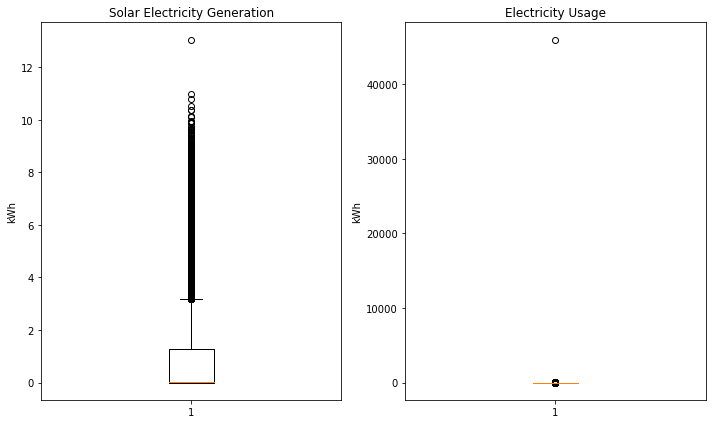

In [11]:
# Generating boxplots for Solar Electricity Generation and Electricity Usage
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['Solar electricity generation (kWh)'])
plt.title('Solar Electricity Generation')
plt.ylabel('kWh')

plt.subplot(1, 2, 2)
plt.boxplot(df['Electricity usage (kWh)'])
plt.title('Electricity Usage')
plt.ylabel('kWh')

plt.tight_layout()
plt.show()

* Solar Electricity Generation shows a relatively narrow box with no outliers. This suggests that the distribution of solar electricity generation is consistent across hours without significant variability.

* Electricity Usage has outlier .

We check for the irregular value and drop it

In [12]:
max_value_index = df['Electricity usage (kWh)'].idxmax()

if max_value_index in df.index:
    df = df.drop(index=max_value_index)

* From the analysis we will have to drop the maximum value in Electricity Usage for Data Normality

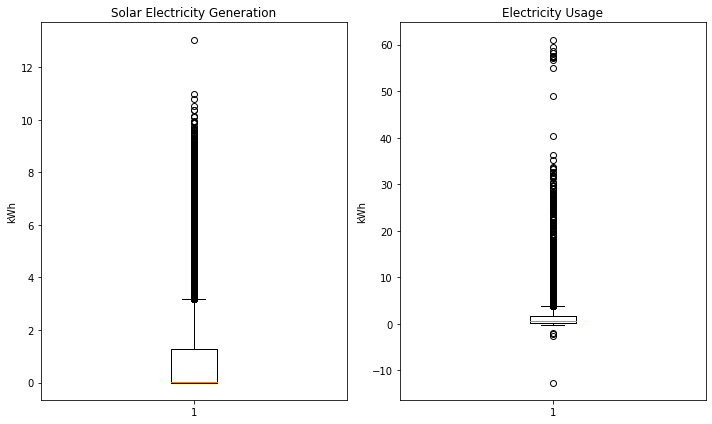

In [13]:
# Generating boxplots for Solar Electricity Generation and Electricity Usage
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['Solar electricity generation (kWh)'])
plt.title('Solar Electricity Generation')
plt.ylabel('kWh')

plt.subplot(1, 2, 2)
plt.boxplot(df['Electricity usage (kWh)'])
plt.title('Electricity Usage')
plt.ylabel('kWh')

plt.tight_layout()
plt.show()

* Both Solar Electricity Generation and Electricity Usage have no outlier .

In [14]:
# Converting "Date/hour start" to datetime
df["Date/hour start"] = pd.to_datetime(df["Date/hour start"])

# Exploratory Data Analysis

### Univariate Analysis

In [15]:
df.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8759.000000,8759.000000,8759.000000
mean,11.499943,1.116282,2.061798
std,6.922975,2.025741,4.641550
min,0.000000,0.000000,-12.624000
25%,5.500000,0.000000,0.300000
50%,11.000000,0.024000,0.621000
75%,17.500000,1.272000,1.686000
max,23.000000,13.050000,61.102800


* Solar Electricity Generation Mean: 1.117
* Solar Electricity Generation Min: 0.0
* Solar Electricity Generation Max: 13.05

* Electricity Usage Mean: 7.315
* Electricity Usage Min: -12.624
* Electricity Usage Max: 46000.0

* Hour Range: 23
* Minimum Hour: 0
* Maximum Hour: 23

**Total Solar electricity generation (kWh)**: The total Solar electricity generation (kWh) range from 0 to 13.05, with a mean of approximately 1.17 kWh and a standard deviation of 2.03 kWh

**Total Electricity usage (kWh)**: The total Electricity usage (kWh) range from -12.62 to 46000, with a mean of approximately 7.31 and a standard deviation of 491.47.


### Bivariate Analysis

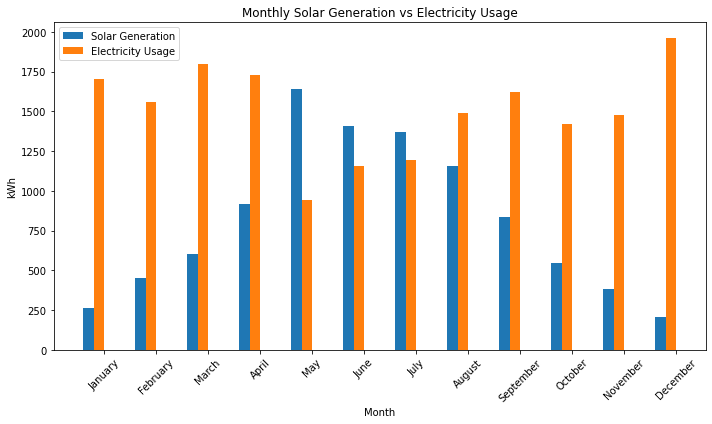

In [16]:
# Grouping the data by month and calculating the sums
monthly_data = df.resample('M', on='Date/hour start').sum()

# Creating a bar chart to illustrate the monthly data
months = monthly_data.index.strftime('%B')
x = np.arange(len(months))

plt.figure(figsize=(10, 6))
plt.bar(x, monthly_data['Solar electricity generation (kWh)'], width=0.2, label='Solar Generation')
plt.bar(x + 0.2, monthly_data['Electricity usage (kWh)'], width=0.2, label='Electricity Usage')
plt.xticks(x + 0.3, months, rotation=45)
plt.xlabel('Month')
plt.ylabel('kWh')
plt.title('Monthly Solar Generation vs Electricity Usage')
plt.legend()
plt.tight_layout()
plt.show()

* December had the high Amount of Electricity usage compared to Solar Usage.
* more than 50% of the data shows that Electricity Usage has been high compared to Solar Generation.
* May, June and July were the only months with Solar Generation greater than Electricity Usage

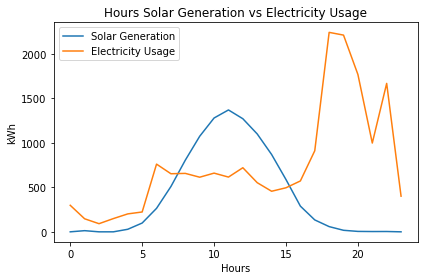

In [17]:
# Group the DataFrame by hour
grouped_df = df.groupby("Hour")

# Calculate the sum of the values in each hour
Hourly_data = grouped_df.sum()

# Create a list of x-axis values
x = np.arange(len(Hourly_data))

# Plot the line graph
plt.plot(x, Hourly_data['Solar electricity generation (kWh)'], label='Solar Generation')
plt.plot(x, Hourly_data['Electricity usage (kWh)'], label='Electricity Usage')
plt.xlabel('Hours')
plt.ylabel('kWh')
plt.title('Hours Solar Generation vs Electricity Usage')
plt.legend()
plt.tight_layout()
plt.show()

* At Noon Solar electricity generation (kWh) is high while in the night Electricity Usage is high this is due to unavailability of sun light during the Night

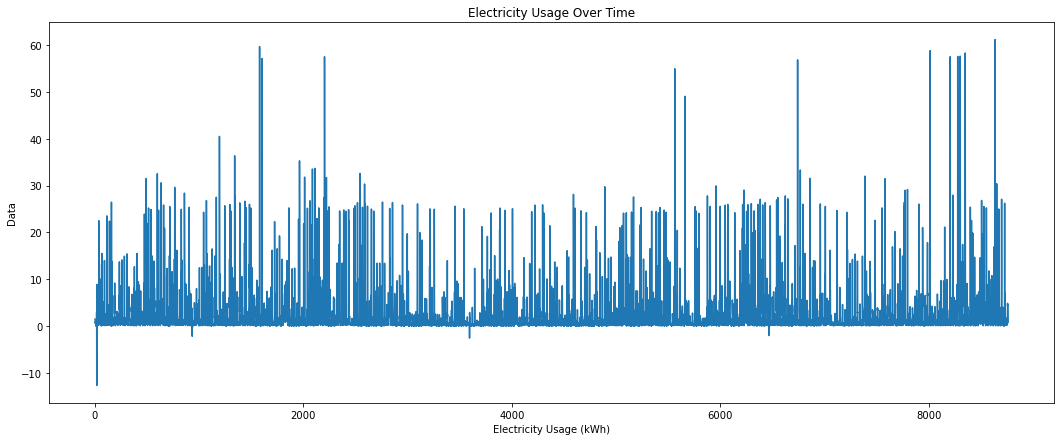

In [18]:
# Time series visualization
plt.figure(figsize=(18, 7))
plt.plot(df['Electricity usage (kWh)'])
plt.xlabel('Electricity Usage (kWh)')
plt.ylabel('Data')
plt.title('Electricity Usage Over Time')
plt.show()

* There are some random fluctuations in the solar electricity generation, but the overall trend is upwards.

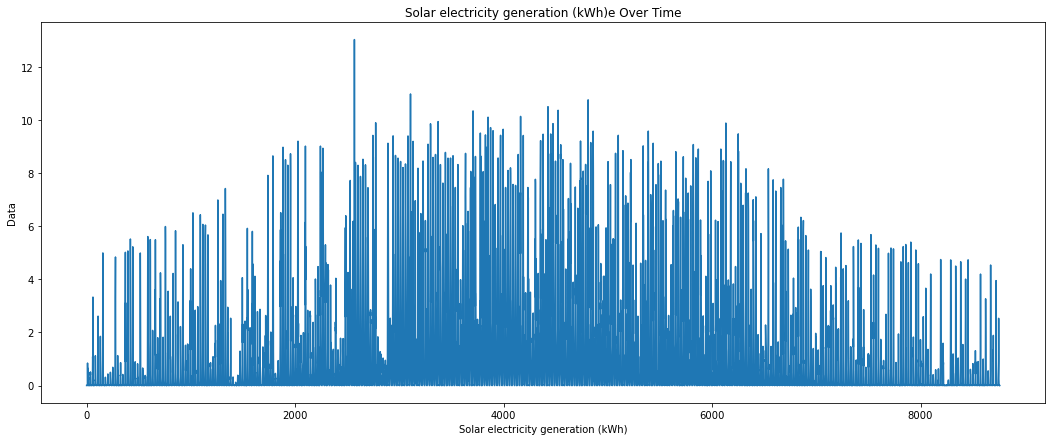

In [19]:
plt.figure(figsize=(18, 7))
plt.plot(df['Solar electricity generation (kWh)'])
plt.xlabel('Solar electricity generation (kWh)')
plt.ylabel('Data')
plt.title('Solar electricity generation (kWh)e Over Time')
plt.show()

* The solar electricity generation has a general increasing trend over time.
* There are some random fluctuations in the solar electricity generation, but the overall trend is upwards.

## Feature Engineering

In [30]:
df['Electricity_Bought_(kWh)'] = df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)']
df['Excess_Solar_Electricity (kWh)'] = df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)']

# To remove all the negative numbers
df['Excess_Solar Electricity (kWh)'] = df['Excess_Solar_Electricity (kWh)'].apply(lambda x: max(0, x))
df['Electricity_Bought_(kWh)'] = df['Electricity_Bought_(kWh)'].apply(lambda x: max(0, x))

#### Model cumulative battery charge level

In [21]:
cumulative_charge = [0]

for i in range(1, len(df)):
    new_charge = max(min(df.iloc[i]['Electricity_Bought_(kWh)'] + df.iloc[i]['Excess_Solar_Electricity (kWh)'] - cumulative_charge[i - 1], max_battery_charge), 0)
    cumulative_charge.append(new_charge)

df['Cumulative_Battery_Charge_(kWh)'] = cumulative_charge

Calculating electricity bought from the electricity provider with the battery

In [22]:
df['Electricity_Bought_with_Battery_(kWh)'] = df['Electricity_Bought_(kWh)'] + df['Cumulative_Battery_Charge_(kWh)']
df['Electricity_Bought_with_Battery_(kWh)'] = df['Electricity_Bought_with_Battery_(kWh)'].apply(lambda x: max(0, x))

#### Vizualization of Monthly Solar Generation, Electricity Usage, Electricity Bought and Purchased Electricity

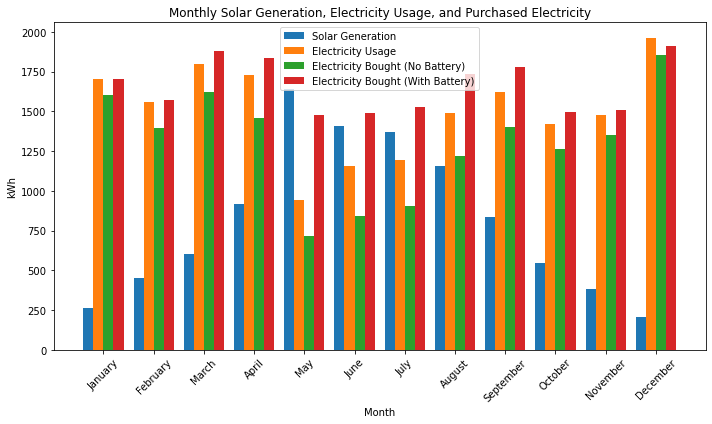

In [23]:
# Grouping the data by month and calculating the sums
monthly_data = df.resample('M', on='Date/hour start').sum()

# Creating a bar chart to illustrate the monthly data
months = monthly_data.index.strftime('%B')
x = np.arange(len(months))

plt.figure(figsize=(10, 6))
plt.bar(x, monthly_data['Solar electricity generation (kWh)'], width=0.2, label='Solar Generation')
plt.bar(x + 0.2, monthly_data['Electricity usage (kWh)'], width=0.2, label='Electricity Usage')
plt.bar(x + 0.4, monthly_data['Electricity_Bought_(kWh)'], width=0.2, label='Electricity Bought (No Battery)')
plt.bar(x + 0.6, monthly_data['Electricity_Bought_with_Battery_(kWh)'], width=0.2, label='Electricity Bought (With Battery)')
plt.xticks(x + 0.3, months, rotation=45)
plt.xlabel('Month')
plt.ylabel('kWh')
plt.title('Monthly Solar Generation, Electricity Usage, and Purchased Electricity')
plt.legend()
plt.tight_layout()
plt.show()

The "Electricity Bought (With Battery)" bars are consistently increasing than the "Electricity Bought (No Battery)" bars, it indicates that the battery system is effectively reducing electricity purchases as months go by, leading to cost savings.

In [24]:
# Calculating the amount of electricity for each hour in 2020 that would have been bought from the electricity provider, assuming a battery had already been installed
df['Remaining_Electricity_Bought_(kWh)'] = df['Electricity_Bought_(kWh)'] - df['Cumulative_Battery_Charge_(kWh)'].shift().fillna(0)
df['Remaining_Electricity_Bought_(kWh)'] = df['Remaining_Electricity_Bought_(kWh)'].clip(lower=0)

##### savings made in 2020

In [25]:
# Calculating the saving over 2020 from installing a battery compared to using the existing solar panels alone
saving = df['Remaining_Electricity_Bought_(kWh)'].sum() * electricity_price
print(f'Saving over 2020: ${saving:.2f}')

Saving over 2020: $2602.77


## Modelling

In [26]:
years = np.arange(2022, 2022 + 20)
# Project forward for 20 years from 1 January 2022 the annual savings from installing the battery for the two scenarios
annual_savings_scenario_1 = []
annual_savings_scenario_2 = []
for year in range(battery_lifetime):
    # Calculate the annual electricity price for scenario 1
    annual_electricity_price_scenario_1 = electricity_price * (1 + electricity_price_inflation) ** year

    # Calculate the annual savings for scenario 1
    annual_saving_scenario_1 = df['Remaining_Electricity_Bought_(kWh)'].sum() * annual_electricity_price_scenario_1
    annual_savings_scenario_1.append(annual_saving_scenario_1)

    # Calculate the annual electricity price for scenario 2
    annual_electricity_price_scenario_2 = electricity_price * (1 + electricity_price_inflation + year * additional_electricity_price_inflation) ** year

    # Calculate the annual savings for scenario 2
    annual_saving_scenario_2 = df['Remaining_Electricity_Bought_(kWh)'].sum() * annual_electricity_price_scenario_2
    annual_savings_scenario_2.append(annual_saving_scenario_2)

data = {
    'Year': years,
    'Government_scenario': annual_savings_scenario_1,
    'Naomi Scenario': annual_savings_scenario_2,
}
savings_df = pd.DataFrame(data)
print(savings_df)

    Year  Government_scenario  Naomi Scenario
0   2022          2602.768002     2602.768002
1   2023          2706.878722     2713.385642
2   2024          2815.153871     2842.287727
3   2025          2927.760026     2991.558872
4   2026          3044.870427     3163.680774
5   2027          3166.665244     3361.599585
6   2028          3293.331853     3588.807937
7   2029          3425.065128     3849.444755
8   2030          3562.067733     4148.416768
9   2031          3704.550442     4491.546575
10  2032          3852.732460     4885.753330
11  2033          4006.841758     5339.273645
12  2034          4167.115428     5861.932202
13  2035          4333.800046     6465.474007
14  2036          4507.152047     7163.973298
15  2037          4687.438129     7974.338031
16  2038          4874.935654     8916.933888
17  2039          5069.933081    10016.358135
18  2040          5272.730404    11302.401900
19  2041          5483.639620    12811.249991


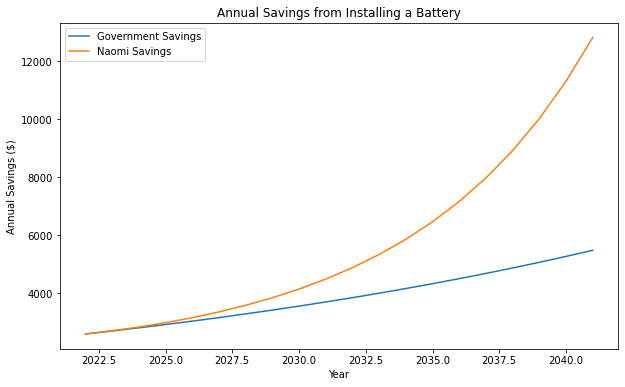

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(years, annual_savings_scenario_1, label='Government Savings')
plt.plot(years, annual_savings_scenario_2, label='Naomi Savings')
plt.title('Annual Savings from Installing a Battery')
plt.xlabel('Year')
plt.ylabel('Annual Savings (\$)')
plt.legend()
plt.show()

from the following chart "Naomi Savings" line has surpasses the "Government Savings" line, it suggests that Naomi's assumption of higher electricity price inflation may lead to more significant savings over the years.

### Calculating Net Present Value (NPV)

In [28]:
# calculate the Net Present Value (NPV) of the future annual savings
def npv(discount_rate, cashflows):
    """Calculate the Net Present Value of a series of cashflows"""
    return sum(cashflow / (1 + discount_rate) ** i for i, cashflow in enumerate(cashflows))

npv_scenario_1 = npv(0.05, annual_savings_scenario_1)
npv_scenario_2 = npv(0.05, annual_savings_scenario_2)

# Print the NPV of future annual savings for both scenarios
print("NPV of Future Annual Savings (Government Estimate):", npv_scenario_1)
print("NPV of Future Annual Savings (Naomi's Estimate):", npv_scenario_2)

NPV of Future Annual Savings (Government Estimate): 47604.15000430874
NPV of Future Annual Savings (Naomi's Estimate): 65192.21074785259


the NPV of future annual savings using the government’s estimate of electricity price inflation is U.S Dollars 47,604.15, while the NPV of future annual savings using Naomi’s estimate of electricity price inflation is U.S Dollars 65,192.21. This suggests that if Naomi’s estimate of electricity price inflation is accurate, she could expect to achieve greater savings by installing a battery than if she relied on the government’s estimate.

### Calculating Internal Rate of Return(IRR)

In [29]:
# Calculating the Internal Rate of Return (IRR)
def irr(cashflows):
    """Calculate the Internal Rate of Return of a series of cashflows"""
    return root(lambda r: npv(r, cashflows) - battery_cost, 0).x[0]

irr_scenario_1 = irr(annual_savings_scenario_1)
irr_scenario_2 = irr(annual_savings_scenario_2)

# Print the IRR for both scenarios
print("Internal Rate of Return (IRR) - Government Estimate:", irr_scenario_1)
print("Internal Rate of Return (IRR) - Naomi's Estimate:", irr_scenario_2)

Internal Rate of Return (IRR) - Government Estimate: 0.6554971686947725
Internal Rate of Return (IRR) - Naomi's Estimate: 0.6731583295984921


 The IRR using the government’s estimate of electricity price inflation is 65.55%, while the IRR using Naomi’s estimate of electricity price inflation is 67.32%. This suggests that if Naomi’s estimate of electricity price inflation is accurate, she could expect to achieve a higher rate of return on her investment in a battery than if she relied on the government’s estimate.

## Conclusion

* The IRR calculated based on the government's projected electricity price inflation stands at 65.55%, whereas the IRR using Naomi’s estimated electricity price inflation is higher at 67.32%.
* When considering NPV, the projected future annual savings using the government's electricity price inflation estimation equates to U.S. Dollars 47,604.15. However, based on Naomi’s inflation estimate, the NPV of future annual savings amounts to U.S. Dollars 65,192.21.
* Both the IRR and NPV results collectively suggest that Naomi's decision to proceed with purchasing and installing batteries is well-founded.
* The inclusion of a 0.25% increment in inflation estimation could potentially amplify savings, particularly if the inflation rate remains steady over time.

## Recommendations
Based on the outcomes of our analysis, we propose the following recommendations:

* Battery Installation Decision: Given the favorable results in terms of IRR and NPV, it is recommended that Naomi proceed with her plans to purchase and install batteries.
* Inflation Projection Accuracy: Naomi should carefully consider regularly monitoring and updating the inflation projection to ensure alignment with actual market trends, which could impact long-term savings predictions.
* Continuous Monitoring:Post-battery installation, continuous monitoring of the actual electricity usage, solar generation, and battery performance is crucial.Regularly assess and compare the actual outcomes with the predicted ones to ensure the investment's effectiveness.
* Data Quality Enhancement: Further enhance the data quality by incorporating more detailed and accurate information, such as potential weather factors impacting solar electricity generation.This improved data granularity could lead to more precise predictions and insights.
* Long-Term Planning: Since the battery's lifetime is expected to be 20 years, it is recommended to periodically reassess the investment's performance and consider potential upgrades or replacements as technology advances.



## Future Work:
* Expand Model Diversity: Consider employing additional models such as Random Forest, Decision Tree, and Logistic Regression for a more comprehensive analysis, enabling deeper insights and comparisons.

* Investigate Voltage Discrepancies: Conduct a detailed exploration into the factors contributing to variations in electricity consumption. This could involve engaging with electricity consumers through surveys or interviews to uncover underlying patterns.

* Enhance Model Performance: Test the current model with a larger dataset to enhance its accuracy metrics, namely Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). This expanded dataset could potentially facilitate the implementation of proactive retention strategies.